In [253]:
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import RandomizedPCA
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

In [176]:
df = pd.read_csv('misconduct.csv', header=False)
df = df.dropna(subset=['Misconduct Description', 'Action'])

In [155]:
df

Name  \
0                    563 Grand Medical, P.C.   
1                              Aaron, Joseph   
2                          Aarons, Mark Gold   
3                          Abadi, Jamsheed S   
4                               Abassi, Lila   
5                       Abbasi, Abdul Hafeez   
6                           Abbassi, Samih R   
7                      Abboud, Aiman Michael   
8             Abdel-Al, Naglaa Zidan Elsayed   
9         Abdel-Hameed, Mohammad Fathi Ahmad   
10        Abdel-Hameed, Mohammad Fathi Ahmad   
11                  Abdeljaber, Mutee Husein   
12                       Abdelmessih, Azmi L   
13                             Abdi, Izhar A   
14                             Abdi, Izhar A   
15                    Abdul- Razzaque, Ahmed   
16                         Abdul-Noor, Farid   
17                            Abeles, Ernest   
18                     Abeyatunge, Lambert R   
19                           Abir, Fereydoon   
20                           Abir, Fereydoon   
21                            Abitbol, Andre   
22    Able Diagnostic Medical Services, P.C.   
23                    Aboumrad, Joseph Fawzi   
24                            Abraham, Akiva   
25                          Abraham, Brian I   
26                  Abraham, Michael Charles   
27                            Abramo, Arnold   
28                          Abrams, Harvey L   
29                           Abramson, David   
...                                      ...   
7102                      Zhitlovsky, German   
7103                      Zhitlovsky, German   
7104                         Zhong, Chizheng   
7105                             Zhu, Mary M   
7106                         Zhu, Ming Zhong   
7107                      Ziering, William H   
7108                           Ziets, Robert   
7109                    Zigelbaum, Sheldon D   
7110                        Zikria, Bashir A   
7111                            Zimba, Frank   
7112                       Zimmerman, Arnold   
7113               Zimmerman, Daniel Jeffrey   
7114                      Zimmerman, Raymond   
7115                      Ziomek, John Josef   
7116                       Zipper, Jeffrey A   
7117                              Zisk, Gary   
7118                          Zisman, Parvin   
7119                          Zito, Joseph A   
7120                        Zizmor, Jonathan   
7121                            Zizza, Frank   
7122                          Zois, Christ L   
7123                        Zoppa, Richard M   
7124                           Zubkin, Allan   
7125                   Zucker, Arnold Harris   
7126               Zuckerman, Steven Jeffrey   
7127                   Zuerndorfer, Gordon H   
7128                          Zulfacar, Mary   
7129                           Zuniga, Dario   
7130                         Zuttah, Silas H   
7131                   Zweig, Steven Jeffrey   

                                                Address License Number  \
0                563 Grand Street\r\nBrooklyn, NY 11211         196275   
1           2803 North 700 East \r\n Provo, Utah  84604         072800   
2     P.O.Box 845\r\nSouthern Pines, North Carolina ...         161530   
3                                      Address redacted         136045   
4                                      Address redacted           None   
5           237 Travis Avenue\r\nElmont, New York 11003         183025   
6     11 Gorga Place \r\n Washington Township, New J...         171180   
7     1009 Brighton Beach Avenue\r\nSuite 3\r\nBrook...         232699   
8                                      Address redacted         227440   
9      10150 Brandon Circle \r\n Orlando, Florida 32836         173309   
10            10086 Brandon Circle\r\nOrlando, FL 32836         173309   
11                                     Address Redacted         189612   
12    E.J.Noble Hospital\r\n77 Barney Street\r\nGouv...         147792   
13    146 Sheridan Avenue \

In [237]:
for x in ['surrender', 'revoked','revoke', 'surrendered',
          'Surrender', 'Revoked', 'Revoke', 'Revocation', 'revocation',
          'Surrendered']:
    df.loc[df['Action'].str.contains(x), 'Action'] = 'lost license'


In [238]:
for x in ['dismissed', 'dropped', 'Dismissed', 'Dropped', 'No penalty']:
    df.loc[df.Action.str.contains(x), 'Action'] = 'dropped'

In [239]:
for x in ['fine', 'Fined', 'Fine', 'fined']:
    df.loc[df.Action.str.contains(x), 'Action'] = 'fine'

In [240]:
for x in ['Suspension', 'suspension']:
    df.loc[df.Action.str.contains(x), 'Action'] = 'suspension'

In [241]:
df.loc[df.Action == 'fine']

Name  \
11             Abdeljaber, Mutee Husein   
19                      Abir, Fereydoon   
29                      Abramson, David   
34    Acenas-Recientes, Elizabeth Sison   
37                   Acker, Gerald Alan   
44                 Acuna, Jose Gonzalez   
51                         Adams, Peter   
55                     Adegbite, Samson   
56                     Adegbite, Samson   
74                  Africano, Enrique A   
78                 Agarwala, Atul Kumar   
82             Aggarwal, Mukesh Chander   
88                        Agrawal, Arun   
92                   Aguirre, Richard S   
94                          Ahmad, Aziz   
96                    Ahmad, Syed Javed   
101                        Ahmed, Naeem   
102                     Ahmed, Shaikh M   
104                       Ahuja, Arvind   
110                       Akerman, Abel   
118                     Alandy, Antonio   
122            Albertini, Francis James   
128       Alerte, Marc Antoine Reynolds   
130                     Alexander, Dale   
131                     Alexander, Dale   
139            Alexandre, Serge Lefevre   
141                       Alexis, Uel J   
152                       Alley, John A   
163                 Almentero, Medina F   
164                    Almeyda, Julio C   
...                                 ...   
6896                   Whitney, D.Terry   
6900                Wider, Todd Michael   
6916                  Wilkinson, Hugh A   
6932                     Willis, Robert   
6946                   Winkler, David M   
6956                Wohltmann, Virginia   
6958                 Wojcik, Thaddeus S   
6972                 Woloszyn, Thomas T   
6979        Wooding, Ian Arthur Douglas   
6991               Wright, Robert Eldon   
6993               Wu, Benson Ming-Shun   
6994                       Wu, Bonnie L   
7000                Wyne, Jamshad Iqbal   
7003                       Xia, Richang   
7006                   Yager, Jeffrey S   
7018                     Yang, Joo-Sock   
7029                    Yehudian, Irage   
7033               Yermian, John-Paul R   
7034          Yerneni, Purnachandra Rao   
7040                      Ying, Yu Kang   
7047                    Young, Ivan R Y   
7059                     Yurfeld, Sofya   
7067                      Zadeh, Mehran   
7072                          Zak, John   
7076       Zalmanov, Mikhail Isaakovich   
7111                       Zimba, Frank   
7116                  Zipper, Jeffrey A   
7120                   Zizmor, Jonathan   
7127              Zuerndorfer, Gordon H   
7131              Zweig, Steven Jeffrey   

                                                Address License Number  \
11                                     Address Redacted         189612   
19      675 Water Street \r\n New York, New York  10002         121310   
29    4200 42nd Street, NW  \r\n Washington, D.C.   ...         172405   
34    150 Robby Lane\r\nManhasset Hills, New York 11040         163510   
37    1 Expressway Plaza \r\n Roslyn Heights, New Yo...         094882   
44    116 Weldon Way \r\n Pennington, New Jersey  08...         190863   
51    265 Mountain Road\r\nEngle Wood, New Jersey 07631         108609   
55    28 Stoneledge Court \r\n Williamsville, New Yo...         175350   
56    28 Stoneledge Court \r\n Williamsville, New Yo...         175350   
74    240 N. Wickham Road, Suite 104\r\nMelbourne, F...         192924   
78    Medaid Medical & Eye Center\r\n1602 St. Nichol...         190087   
82    3403 Caramboia Circle\r\nMelbourne, Florida 32940         137346   
88    84 Second Street \r\n Garden City, New York  1...         159622   
92        6641Kellerman Road\r\nConesus, New York 14435         213119   
94        475 Seaview Avenue\r\nStaten Island, NY 10305         215482   
96    608 Bellmore Road \r\n East Meadow, New York 1...         163156   
101   2905 Hylan Boulevard\r\nStaten Island, New Yor...         140418   
102              149 Main Street\r\n

In [242]:
df.iloc[15]['Misconduct Description']

'reprimand'

In [243]:
pd.unique(df.Action)

array(['lost license', 'reprimand', 'fine', 'suspension', 'dropped'], dtype=object)

In [244]:
df.loc[df.Action.str.len() > 12] = 'reprimand'
df.loc[df.Action == 'Reprimand'] = 'reprimand'

print pd.unique(df.Action)

['lost license' 'reprimand' 'fine' 'suspension' 'dropped']


In [245]:
X_full = list(df['Misconduct Description'])
y_full = list(df['Action'])

In [246]:
#train test splitting

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, train_size=.8, random_state=19)

In [254]:
stop_words = ('the', 'in', 'a','he','she', 'at', 'physician')

full_clf = Pipeline([('vect', CountVectorizer(stop_words=stop_words)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', GaussianNB())])
#                      ('clf', KNeighborsClassifier(n_neighbors=13,
#                                                   weights='distance'))])

In [255]:
full_clf.fit(np.asarray(X_train), np.asarray(y_train))
np.mean(full_clf.predict(X_test) == y_test)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

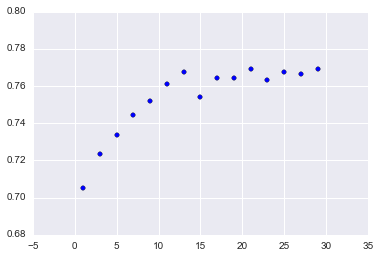

In [252]:
ks = []
accuracy = []



for k in range(1,31,2):
    ks.append(k)
    full_clf = Pipeline([('vect', CountVectorizer(stop_words=stop_words)),
                         ('tfidf', TfidfTransformer()),
                         ('clf', KNeighborsClassifier(n_neighbors=k,
                                                      weights='distance'))])  
    full_clf.fit(X_train, y_train)    
    accuracy.append(np.mean(full_clf.predict(X_test) == y_test))
plt.scatter(ks, accuracy)

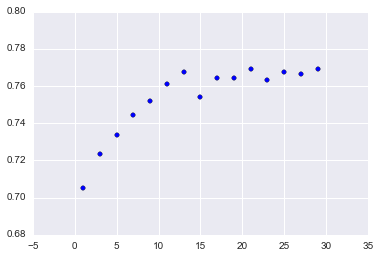

In [251]:
v = full_clf.predict(X_test)

a_counts = {}
for x in set(v):
    a_counts[x] = len([a for a in v if a == x])
print a_counts

b_counts = {}
for x in set(y_test):
    b_counts[x] = len([a for a in y_test if a == x])
print b_counts

{'suspension': 116, 'lost license': 841, 'fine': 108, 'dropped': 3, 'reprimand': 352}
{'suspension': 197, 'lost license': 673, 'fine': 191, 'dropped': 7, 'reprimand': 352}
